### NOTATECZKI

#R_temp to to samo co Tdeg_C czyli temperatura w celcjuszach

In [26]:
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

I'm importing the bottle dataset from kaggle. The dataset will be called bottle_df. Let's inspect the first 5 rows of the dataframe with .head().

In [27]:
bottle_df = pd.read_csv(r"C:\Users\szymo\OneDrive\Desktop\pyton_projekty\ML_p3\bottle.csv")
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
bottle_df.shape

(864863, 74)

In [29]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

We can see ther's a lot of float() variables, probably due to NaN values. To work with PCA first, we have to clean the data. We start with importing neccesary packagges.

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

Then we define the target column which is the temperature of water in Celcius.

In [31]:
target = "T_degC"

Drop the columns with more than 30% missing values.

In [32]:
perc_null = (bottle_df.isnull().sum() / bottle_df.shape[0]).to_dict()
nn_cols = [col for col in bottle_df.columns if perc_null[col] <= 0.3]
df = bottle_df[nn_cols]

Drop rows with missing values from left columns.

In [33]:
df = df.dropna(subset=[target])

Dividing set into train and test.

In [34]:
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Finally, we defnie a function transforming non-numerical to numerical.

In [35]:

def preprocess_data_simple(df, drop_threshold=70, num_strategy="mean", fill_value=-999):
    """
    drop_threshold can accept any value between 0 and 100;
    num_strategy can accept "mean", "median" or "constant"
    fill_value: to be specified when num_strategy = "constant"...can take any value
    """
    
    data = df.copy()  # make a copy of the original dataframe
    
    # Drop columns with percent of missing values greater than the threshold
    percent_missing = data.isna().sum() / data.shape[0] * 100
    columns_to_drop = percent_missing[percent_missing > drop_threshold].index
    data.drop(columns_to_drop, axis=1, inplace=True)
    
    # Separate numerical and categorical columns
    num_attributes = data.select_dtypes(include=['float64', 'int64']).columns
    cat_attributes = data.select_dtypes(include=['object']).columns
    
    # Create a SimpleImputer object for the numerical columns
    if num_strategy == "constant":
        numerical_imputer = SimpleImputer(fill_value=fill_value)
    else:
        numerical_imputer = SimpleImputer(strategy=num_strategy)
    
    # Impute missing values for numerical attributes
    data[num_attributes] = numerical_imputer.fit_transform(data[num_attributes])
    
    # Impute missing values for categorical columns
    data[cat_attributes] = data[cat_attributes].fillna(data[cat_attributes].mode().iloc[0])
    
    # Assert that there are no missing values in the prepared dataframe
    #assert not data.isna().sum().sum()
    #missing = data.isna().sum()
    #print(missing)
    return data



In [36]:

# Zastosowanie funkcji preprocess_data_simple do danych treningowych
X_train = preprocess_data_simple(X_train, drop_threshold=70, num_strategy="mean", fill_value=-999)
# Zastosowanie funkcji preprocess_data_simple do danych testowych
X_test = preprocess_data_simple(X_test, drop_threshold=70, num_strategy="mean", fill_value=-999)


In [37]:
#scaler = StandardScaler()
#scaler.fit(X_train[num_attributes])
#X_train[num_attributes] = scaler.transform(X_train[num_attributes])


In [38]:
#X_scaled = scaler.transform(X_train[num_attributes])

In [39]:
#from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Normalizer
num_attributes = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = Normalizer()
scaler.fit(X_train[num_attributes])
X_train[num_attributes] = scaler.transform(X_train[num_attributes])

In [59]:
X_train[num_attributes].head()

,Cst_Cnt,Btl_Cnt,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
48981,0.032279,0.999428,0.005101,0.000693,0.000065,0.000540,0.000983,0.002850,0.000143,0.000041,0.000061,0.000184,0.000184,0.000184,0.000184,0.000184,0.000184,0.000184,0.000184,0.005101,0.000163,0.000162,0.000693,0.000540,0.003250,1.346664e-05,0.000065,0.000983,0.005121
300866,0.038162,0.999267,0.001661,0.000114,0.000002,0.000090,0.000024,0.000071,0.000023,0.000007,0.000010,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.001661,0.000021,0.000021,0.000114,0.000090,0.000378,2.789886e-06,0.000002,0.000024,0.001671
751576,0.040046,0.999198,0.000162,0.000044,0.000007,0.000034,0.000104,0.000291,0.000004,0.000003,0.000004,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000162,0.000013,0.000013,0.000044,0.000034,0.000321,5.317873e-07,0.000007,0.000104,0.000164
140621,0.037343,0.999299,0.000533,0.000236,0.000035,0.000180,0.000558,0.001520,0.000050,0.000014,0.000021,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,0.000533,0.000078,0.000078,0.000236,0.000180,0.001852,1.634444e-06,0.000035,0.000558,0.000533
530194,0.040426,0.999182,0.000141,0.000062,0.000011,0.000046,0.000195,0.000479,0.000013,0.000004,0.000006,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000141,0.000030,0.000030,0.000062,0.000046,0.000702,5.276757e-07,0.000011,0.000195,0.000141


By utilizing normalization, we can avoid mistakenly assigning points to the wrong clusters when using a clustering process. If we do not take this into account, the KMeans algorithm may end up giving disproportionately greater weight to features with higher magnitudes and may be unaware of features with lower magnitudes but equally important.

In [40]:
#from sklearn.preprocessing import Normalizer
#num_attributes = X_train.select_dtypes(include=['float64', 'int64']).columns
#normal_values = Normalizer().fit_transform(X_train[num_attributes])

To improve a ML process, one of the most effective steps to be executed is to decrease the number of features used in the models. A smaller number of features can often manage to achieve a level of explainability which is similar to the one achieved when using the full dataset. Moreover, it can save a large amount of memory loading and processing. To do so, we can use PCA from the sklearn.decomposition package, which helps us to choose the n features that preserves the most of the variance. To visualize the number of features to be chosen we'll use the matplotlib.pyplot package.

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

We can then plot the cumulative variance ratio, which show us that it's possible to retain almost 100% of the variation by using only 6 out of the 16 features. A number of features that preserves at least 90% of the total variation is a good threshold, so for our example we will take the first five components.

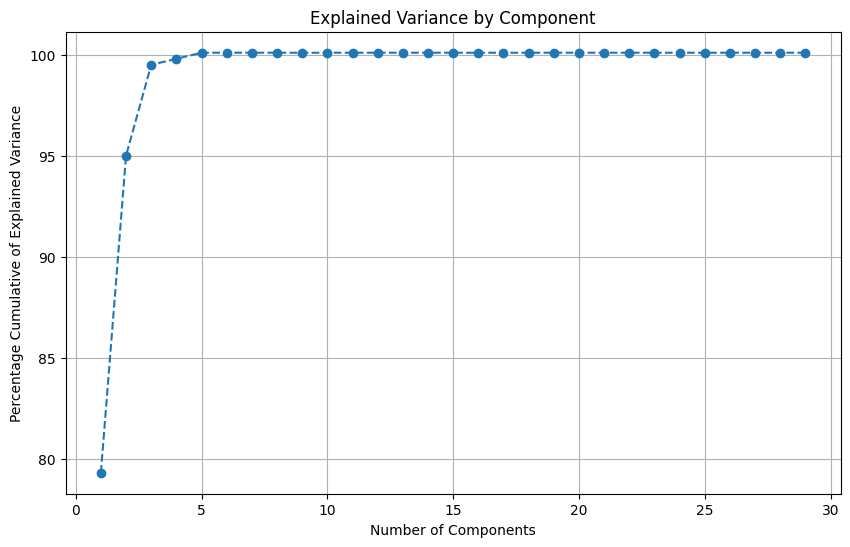

In [42]:
pca = PCA()
pca.fit(X_train[num_attributes])
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

After selecting the number of components, we can perform the PCA reduction with it. To do this, we set the PCA object to ‘pca’ again, this time changing the n_components parameter to 4.

In [43]:
pca = PCA(n_components=4)
x_9d = pca.fit_transform(X_train[num_attributes])

In [66]:
print(pd.DataFrame(pca.components_,columns=X_train[num_attributes].columns))

    Cst_Cnt   Btl_Cnt    Depthm    Salnty    O2ml_L    STheta     O2Sat  \
0 -0.032090 -0.461229  0.480586  0.041344  0.003772  0.032185  0.063496   
1 -0.007840 -0.255932 -0.256350  0.077850  0.009261  0.058904  0.155835   
2 -0.071306  0.846916  0.183657  0.047938  0.003796  0.036189  0.062110   
3  0.975273  0.032291  0.028460  0.007190 -0.002990  0.005231 -0.050039   

   Oxy_µmol/Kg    RecInd    T_prec    S_prec    P_qual    Chlqua    Phaqua  \
0     0.166620  0.006577  0.002431  0.003174  0.011016  0.011016  0.011016   
1     0.405554  0.011132  0.004516  0.005776  0.021250  0.021250  0.021250   
2     0.169419  0.007476  0.002882  0.003645  0.012796  0.012796  0.012796   
3    -0.133989  0.001433  0.000388  0.000655  0.002155  0.002155  0.002155   

       NH3q    C14A1q    C14A2q    DarkAq    MeanAq   R_Depth    R_TEMP  \
0  0.011016  0.011016  0.011016  0.011016  0.011016  0.480586  0.009406   
1  0.021250  0.021250  0.021250  0.021250  0.021250 -0.256350  0.029657   
2  0.012

In [67]:
pd.DataFrame(pca.components_.T, index=X_train[num_attributes].columns)

,0,1,2,3
Cst_Cnt,-0.032090,-0.007840,-0.071306,0.975273
Btl_Cnt,-0.461229,-0.255932,0.846916,0.032291
Depthm,0.480586,-0.256350,0.183657,0.028460
Salnty,0.041344,0.077850,0.047938,0.007190
O2ml_L,0.003772,0.009261,0.003796,-0.002990
STheta,0.032185,0.058904,0.036189,0.005231
O2Sat,0.063496,0.155835,0.062110,-0.050039
Oxy_µmol/Kg,0.166620,0.405554,0.169419,-0.133989
RecInd,0.006577,0.011132,0.007476,0.001433
T_prec,0.002431,0.004516,0.002882,0.000388


Having now applied our specific PCA model with the movie dataset, let's visualise the first 2 projection components as a 2D scatter plot to see if we can get a quick feel for the underlying data.

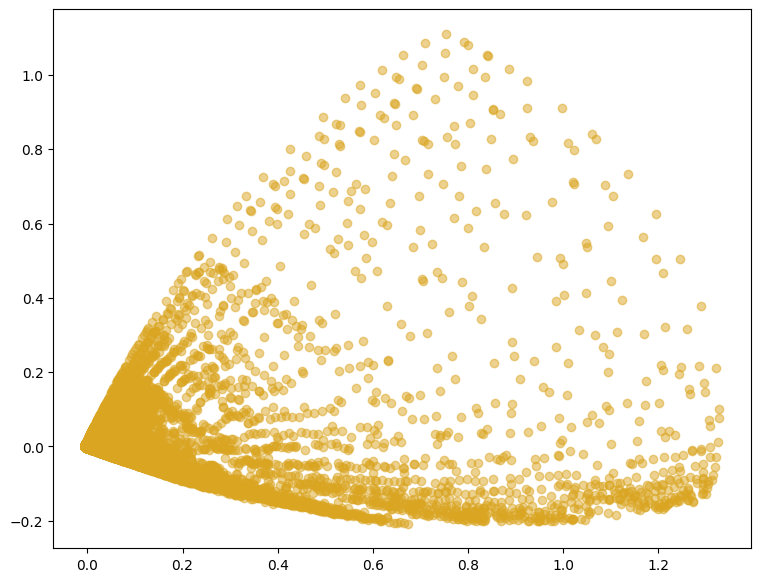

In [44]:
plt.figure(figsize = (9,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c='goldenrod',alpha=0.5)
#plt.xlim(-20,12)
#plt.ylim(-0.16,0.07)
plt.show()

A simple KMeans will now be applied to the PCA projection data. Each cluster will be visualised with a different colour so hopefully we will be able to pick out clusters by eye.

To start off, we set up a KMeans clustering with sklearn's KMeans() and call the "fit_predict" method to compute cluster centers and predict cluster indices for the first and third PCA projections (to see if we can observe any appreciable clusters). We then define our own colour scheme and plot the scatter diagram as follows:

In [45]:
from sklearn.cluster import KMeans

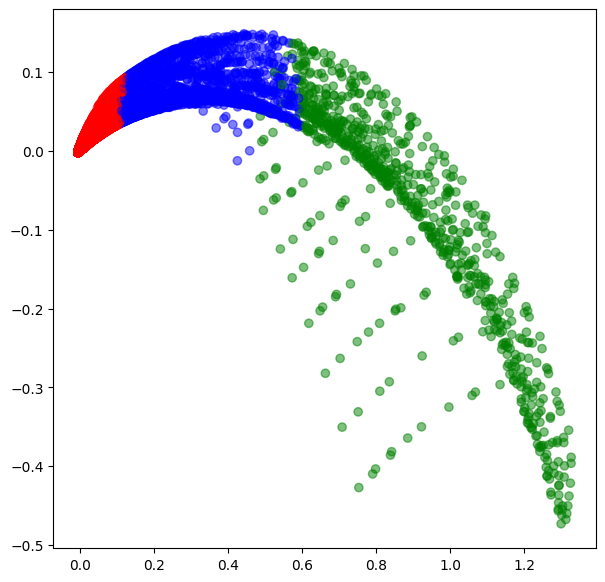

In [46]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5) 
plt.show()

In [47]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

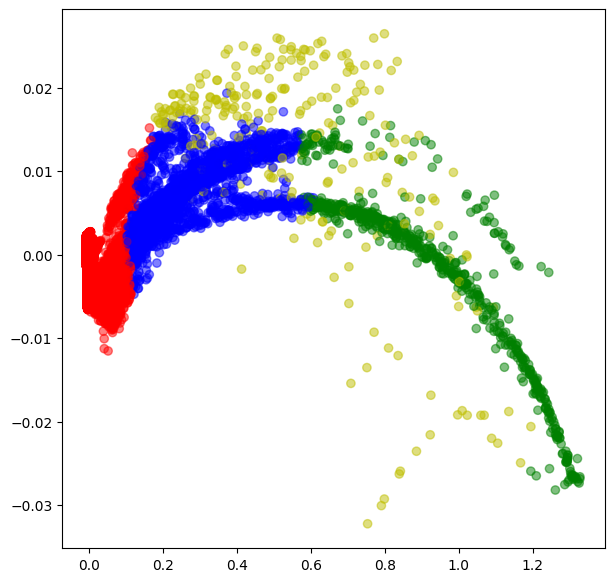

In [48]:
# Set a 4 KMeans clustering
kmeans = KMeans(n_clusters=4)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,3], c= label_color, alpha=0.5) 
plt.show()

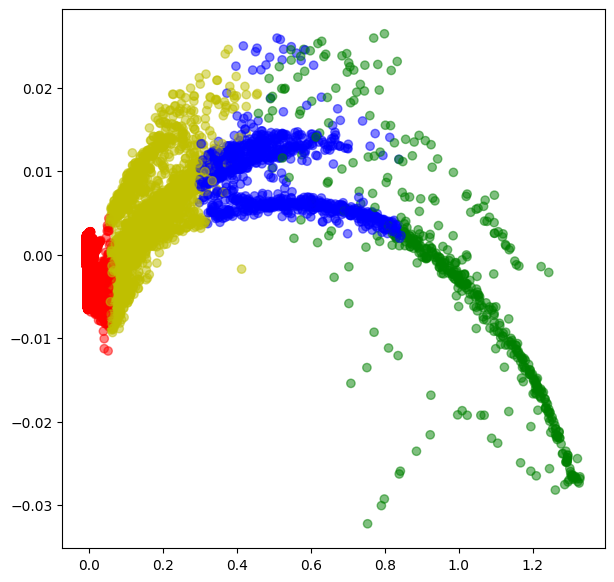

In [49]:
# Set a 4 KMeans clustering
kmeans = KMeans(n_clusters=4)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,3], c= label_color, alpha=0.5) 
plt.show()

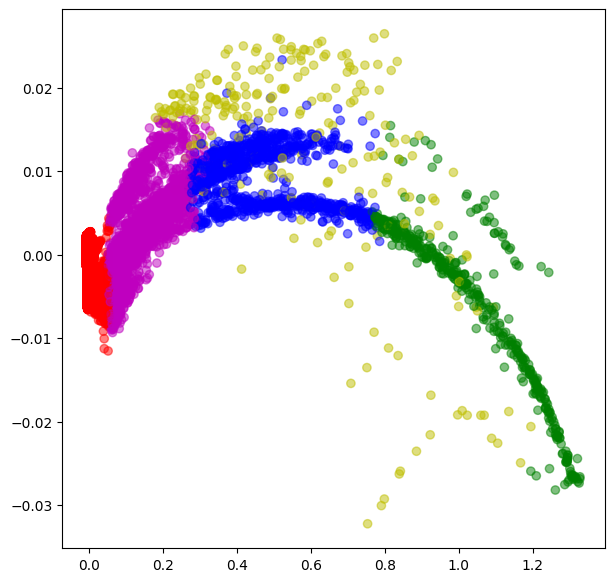

In [50]:
# Set a 4 KMeans clustering
kmeans = KMeans(n_clusters=5)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y',4:'m'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,3], c= label_color, alpha=0.5) 
plt.show()

In [51]:
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(x_9d)
df = df[[1,2,3]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered

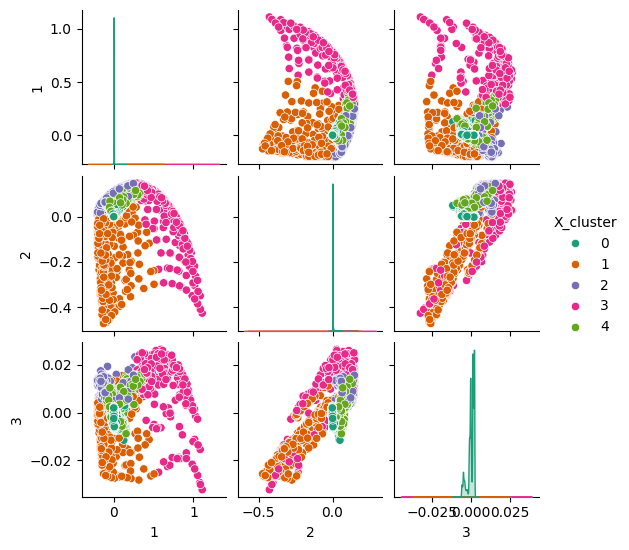

In [52]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)